In [1]:
import cmsisdsp as dsp
import numpy as np
from numpy import pi as PI
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show,semilogx, semilogy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
def chirp(fmin,fmax,dur,t):
    c=(fmax-fmin)/dur
    return(np.sin(2.0*PI*(c/2*t*t+ fmin * t)))

In [59]:
sampling_frequency = 8000 
duration = 4096/sampling_frequency # seconds
time = np.arange(0,duration,1.0 / sampling_frequency)
fmin=10
fmax=500

c=(fmax-fmin)/duration
signal=chirp(fmin,fmax,duration,time)
nb=len(signal)

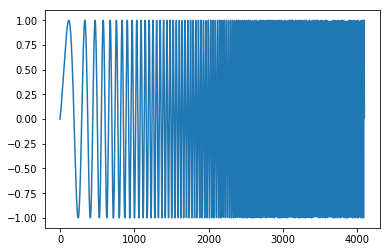

In [60]:
plot(signal)

In [35]:
# Some useful functions to convert between f32 and q31 format.
def q31sat(x):
     if x > 0x7FFFFFFF:
          return(np.int32(0x7FFFFFFF))
     elif x < -0x80000000:
          return(np.int32(0x80000000))
     else:
          return(np.int32(x))

q31satV=np.vectorize(q31sat)

def toQ31(x):
     return(q31satV(np.round(x * (1<<31))))

def Q31toF32(x):
     return(1.0*x / 2**31)
    
# The return of a RFFT is complex. But cmsidsp is returning a flattened buffer with
# twice the size. This function is doing the convertion to complex numbers.
def asComplex(ar):
    return(ar[0::2] + 1j * ar[1::2])

In [62]:
# Initialize the RFFT Q31
rfftq31=dsp.arm_rfft_instance_q31()
status=dsp.arm_rfft_init_q31(rfftq31,nb,0,1)
# Convert the input signal to Q31
signalRQ31=toQ31(signal)
# Compute the RFFT
result = dsp.arm_rfft_q31(rfftq31,signalRQ31)
# Convert the output spectrum to complex float and apply a scaling
result=asComplex(Q31toF32(result)*(1 << 12))


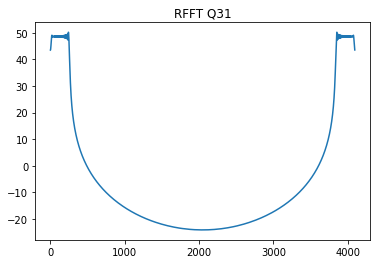

In [63]:
mag=10.0 * np.log(np.abs(result))
plot(mag)
title("RFFT Q31");